# <오늘 할 것: 학습 최적화 기법>
- weight initialization
- nonlinearity(activation function)
- optimizers
- batch normalization
- dropout(regularization)
- model ensemble

# 1. 최적화 기법들: MNIST 예제
- 1-1. 데이터 로드
- 1-2. 모델 구축
- 1-3. 초기화
    - 1-3-1. 정규분포 초기화의 문제점
- 1-4. 활성화 함수
- 1-5. 최적화
    - 1-5-1. momentum
- 1-6. 배치 정규화
- 1-7. 드롭아웃
- 1-8. 앙상블

# 2. 최적화 기법 몽땅 적용해보기

# 3. CNN으로 해보기
- 3-1. 데이터 로드하기
- 3-2. 모델 구축 및 실행하기(CNN)
- 3-3. CNN + 최적화 몇가지

# 1. MNIST 예제

## 1-1. 데이터 준비하기

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [ ]:
# 데이터셋 로드 (MNIST)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

이렇게 받은 데이터는 어디에 있을까?

C:\Users\student\.keras\datasets

여기에 있다.

기본적으로 사용자 폴더에 .keras 디렉토리가 생성되고, 그 안에 로드한 데이터가 저장된다.

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


numpy array 타입이다.
- 고속 처리 가능
- plt.imshow로 확인 가능

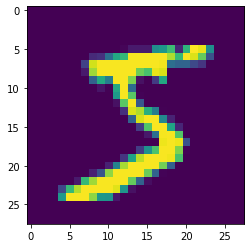

Label:  5


In [5]:
#영상 출력해보기
plt.imshow(X_train[0])
plt.show()
print('Label: ', y_train[0])

In [6]:
#실제 데이터가 어떻게 생겼는지 확인한다.
a = X_train[0]
print(a)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

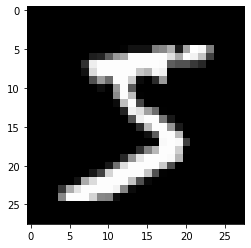

In [7]:
plt.imshow(a, cmap = 'gray')

바이너리 아니다.

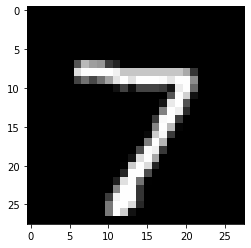

Label:  7


In [8]:
#테스트 셋도 출력해본다.
plt.imshow(X_test[0], cmap = 'gray')
plt.show()
print("Label: ", y_test[0])

In [13]:
#reshaping X data: (, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))   # -1: 나머지는 그냥 알아서 한 차원으로 묶어라
X_test = X_test.reshape((X_test.shape[0], -1))

In [14]:
print(X_train.shape)

(60000, 784)


In [11]:
# 참고
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)
a = a.reshape(2, -1)    #알아서 (2, 3)으로 reshape해줌
print(a)

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]


`train_test_split` 함수로 데이터를 나눌 수 있다.

In [15]:
# 학습 셋 사이즈 줄이기
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [16]:
print(X_train.shape)    #60000개에서 확 줄었다.
print(y_train)    #자동 셔플링이 된다.

(19800, 784)
[6 9 2 ... 5 5 3]


`to_categorical`함수로 one-hot encoding을 수행할 수 있다.

In [17]:
#라벨을 categorical로 변환하기: one-hot encoding; 0 -> 1 0 0 ; 1 -> 0 1 0 ; 2 -> 0 0 1 ...
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
print(y_test.shape)

(10000, 10)


10 --> 클래스가 0부터 9까지 10개 있기 때문에

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


## 1-2. 모델 구축하기

In [27]:
model = Sequential()

model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

`softmax` 활성화 함수
- multiclass 분류일 때 사용한다.
- 각 클래스에 대한 확률을 출력한다.
    - 0일 확률, 1일 확률, 2일 확률, ...
    - 따라서 해당 예제에서는 10개의 값을 출력할 것.

In [28]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감; lr = learning rate
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

optimizer 등의 인자를 넘겨주는 방식
- 문자열로: 기본값 활용
    - e.g. optimizer = 'adam'
- 변수로: learning rate 등의 파라미터를 커스터마이즈해서 활용
    - e.g. optimizer = Adam(0.01)

In [29]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

#validation_split: 30%를 테스트로 쓴 것 --> 학습 데이터로 넘겨준 데이터의 70%만 실질적인 학습 데이터로 활용됨

`history` 메소드로 로그를 확인할 수 있다.
- 결과 = model.fit()
- 결과.history: 로그값이 저장된 **딕셔너리**를 리턴한다.
    - val_loss
    - loss
    - val_accuracy
    - accuracy

In [30]:
history.history

{'val_loss': [2.4925123909908513,
  2.4578119501120312,
  2.4310758088172886,
  2.4098937148598307,
  2.3927522367098515,
  2.37860489469586,
  2.3669272889994613,
  2.3571861511127716,
  2.3491159127617522,
  2.342289336361869,
  2.3363180598827324,
  2.33121954567906,
  2.3269717922917117,
  2.323377029662983,
  2.3202174161018347,
  2.317447720794164,
  2.3151209630548752,
  2.3130268069630118,
  2.3112303091620756,
  2.3096865191604152,
  2.3082775841658365,
  2.3070707937683723,
  2.306110021000358,
  2.3052735882576068,
  2.304475361249262,
  2.3037888263612483,
  2.303215568073671,
  2.3027165974832142,
  2.302276229537296,
  2.3018490080078844,
  2.301502004135337,
  2.3011963643610276,
  2.300940535927461,
  2.3007262693912494,
  2.300512700931793,
  2.3003411472847164,
  2.3001956791990135,
  2.3000412218498463,
  2.2998991614640363,
  2.2997832399426086,
  2.2996672586961227,
  2.2995755553646924,
  2.2994848326801853,
  2.299406721616032,
  2.29933714320764,
  2.29929274388

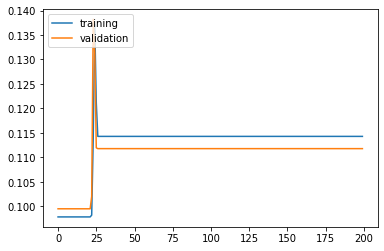

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])     #model.fit()에 validation_split 인자를 넘겨주어야 val_accuracy(& val_loss)를 계산할 수 있음
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

인식률이 상승하지 않는다는 것 == w 업데이트가 이루어지지 않고 있다는 뜻

인식률이 상승하지 않는 것은 sigmoid 탓이다.
- sigmoid가 초기화를 제대로 수행하지 못하기 때문.

##  1-3. 초기화 기법을 바꿔본다.

초기화란?
> 

### 1-3-1. 정규분포 초기화의 문제점
- 정규분포 초기화는 x가 5 이상만 되어도 sigmoid 적용 시 모두 1이 되어 버린다. --> 아무 의미 없어짐
    - -4~4로 초기화 --> sigmoid 적용 시 대부분 0 또는 1이 되어 버린다. --> 아무 의미 없어짐2

=> 표준편차를 이용한 초기화
    - N(0, 0.1)
    - wx + b가 -5~5 사이에 분포하게 됨 --> sigmoid 적용 시 의미있는 값들이 나옴
    
- Xavier: fan_in + fan_out / sigmoid 함수
    - Uniform distribution : sqrt( 6 / (fan_in + fan_out))
        - 최소값, 최대값으로 정규화
    - Normal distribution  : N(0, sqrt(2 / (fan_in + fan_out)))
        - 평균을 무조건 0으로 가정하고 데이터 분포에 따라 분산을 조절
- HE: fan_in 만 / relu 함수
    - Uniform distribution : limit is sqrt( 6 / fan_in)
    - Normal distribution : N(0, sqrt(2 / fan_in))

In [35]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, verbose = 0)

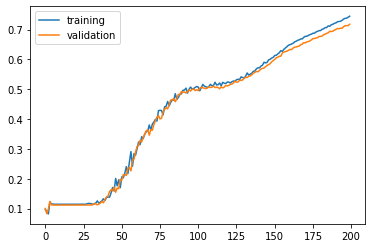

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [38]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [39]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7232999801635742


## 1-4. 활성화 함수도 바꿔본다.

In [40]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [41]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, verbose = 0)

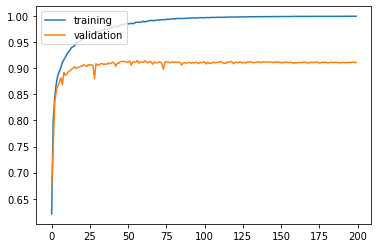

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

relu가 정말 좋다는 것을 알 수 있다.

In [43]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 17us/step


`evaluate` 메소드를 통해 분류 결과를 평가할 수 있다.
- 모델.evaluate(X_테스트, y_테스트)
- 요소를 두 개 가진 리스트를 리턴한다
    - 오차
    - 인식률

In [45]:
results

[0.7360868230940054, 0.9104999899864197]

In [44]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9104999899864197


## 1-5. 최적화 알고리즘도 바꿔본다.

### 초기화 / 활성화 함수 바꾸기 == 좋은 지점에서 출발하자

### 최적화 기법 적용하기 == 좋은 학습 방법을 활용하자
- local minimum에 고였을 때 다시 튀어올라서 global minimum을 찾을 수 있도록 
- local minimum에 빨리 도달할 수 있도록
    - alpha값을 adaptive하게 적용
        - 초기에는 크게, 갈수록 정교하게 --> adam

In [46]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [48]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, verbose = 0)

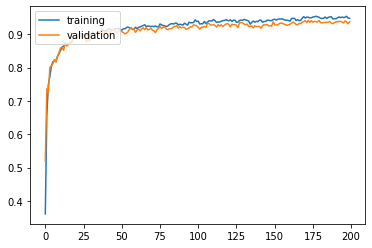

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

sigmoid를 썼고 초기화를 딱히 지정해주지 않았음에도 불구하고 optimizer가 인식률을 충분히 확보해주었다.

In [50]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 18us/step


In [51]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9266999959945679


## 1-5-1. momentum

> 진행 중인 방향으로 관성을 더해 지역 최소점에 빠지지 않도록 함

<img src=momentum.jpg>

- 모멘텀 상수 r: 과거 오차값을 반영할 비율을 결정한다.
    - 최근 것에 가중치를 많이 둠
    - 예전 것은 거의 0에 수렴


- alpha값은 작게 주어야 함.
    - 가속도를 준 상태에서 alpha(lr)까지 크게 주면 해를 지나칠 우려가 있음
    - 기본 SGD를 쓸 때에는 alpha를 꽤 크게 줘야 함 --> 안 그러면 너무 느려짐

## 1-6. 배치 정규화도 해준다.

- 활성화 함수 적용하기 **전**에 해줘야 한다.

In [52]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       #apply batch normalization BEFORE adding activation function
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [53]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, verbose = 0)

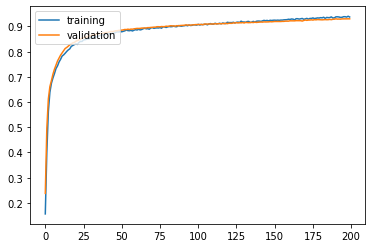

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

가장 나쁜 SGD 그대로 쓰기 + lr도 작게 + sigmoid(not relu) + 초기화도 디폴트로 학습했는데도 

정규화 하나만으로 학습 결과가 잘 나왔다.

## 1-7. 드롭아웃
> 임의의 파라미터의 weight를 0으로 만드는 것 (== 네트워크 연결을 끊는 것)

    - 랜덤하게 선택하는 것이 확률적으로 가장 좋다더라.

- 두 가지 효과를 발생시킨다: voting & co-adaptation
    - voting(ensemble 방법): 다수의 약한 분류기를 모아서 학습 결과를 절충하는 것; 약한 분류기로 강한 분류기 만들기
        - 약한 분류기: 대충 학습시킨 것
        - 강한 분류기: 학습을 많이 시켜서 인식률이 높은 것
        - **인식률보다 중요한 것은 다양성이다!**
        - 드롭아웃을 많이 하면 미니배치 앙상블로 학습한 것과 같은 효과가 발생한다.
            - 실질적으로는 네트워크를 하나만 만들었지만, 드롭아웃을 통해 네트워크 연결이 끊기기 때문에 마치 미니배치 앙상블로 모델을 설계한 것과 같은 효과가 발생하는 것이다.
            - 미니배치 앙상블: 각 분류기가 서로 다른 배치의 데이터로 학습
                - 각 분류기는 약한 분류기가 될 확률이 높아짐 --> voting을 통해 결과 도출
<img src=minibatch.jpg>
    - co-adaptation 해결:
        - co-adaptation: weight가 너무 큰 파라미터에 의해 학습이 좌지우지 되는 것
            - 이러한 weight를 0으로 만들 수 있음
    
    
- **과적합(overfitting)** 문제를 피하기 위한 것.

- 활성화 함수 **후**에 적용한다.

### 과적합
> 학습 데이터에 과도하게 맞추어서 학습이 된 상태

- 오차가 0이다.
- 학습 데이터에 대한 예측률은 100퍼센트이지만, 새로운 데이터에 대한 예측률이 현저히 떨어진다.
- 파라미터가 많을수록, 모델이 깊을수록 많이 발생한다.
    - CNN에서 발생 가능성이 높다.
- cf. under-fitting, appropriate-fitting

#### 과적합 검출
- validation 데이터의 오차율이 감소하다가 다시 증가하는 시점
    - 이때 학습을 멈추면 된다.
    - trainging 데이터의 오차율이 계속 감소하더라도 상관없이

In [59]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer AFTER Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [60]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, verbose = 0)

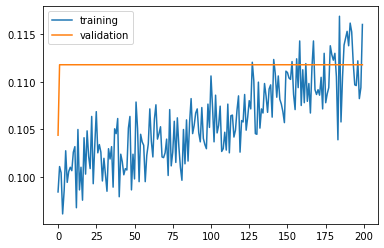

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

학습시켜놨다가 자꾸 무시하니까 training data 그래프가 요동친다.

In [62]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 18us/step


In [63]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1-8. 앙상블 해보기
다수의 모델을 구축한 후에 `VotingClassifer` 함수를 통해 앙상블한다.
- ensemble_clf = VotingClassifier(estimators = [(모델이름, 모델1), (모델2이름, 모델2), ...], voting = 'hard/soft')
    - estimators: (모델이름, 모델)을 요소로 갖는 리스트를 인자로 전달한다. 
    - voting: 두가지 방식이 있다.
        - hard: 분류기마다 가중치를 동일하게 설정
        - soft: 분류기마다 가중치를 다르게 설정
            - 가중치는 분류기별 인식률을 기준으로 설정한다.

In [71]:
print(np.max([1, 2, 3, 4, 1, 8, 2.4]))
print(np.argmax([1, 2, 3, 4, 1, 8, 2.4]))     # max 값의 인덱스를 리턴한다.

# one-hot encoding된 데이터에 적용할 경우 label을 출력하는 용도로 사용할 수 있다.
print(np.argmax([0, 0, 0, 0, 1, 0]))    

#label = [0, 1, 2, 2]

x = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]])
print(np.argmax(x, axis = 1))     # 2차원 array의 경우 max를 연산할 수 있는 방법이 3가지: 전체, 행, 열 --> axis 인자로 조절한다.
print(np.argmax(x, axis = 0))

y = np.array([0.29, 0.4, 0.7])
print(np.argmax(y))

8.0
5
4
[0 1 2 2]
[0 1 2]
2


In [72]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [74]:
print(y_train)

[6 9 2 ... 5 5 3]


In [106]:
#별로인 모델 만드는 함수
def mlp_model():    
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [76]:
#앙상블할 모델을 세 개 만들어준다. (약한 분류기 3개)
model1 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)

In [77]:
#앙상블하기
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3)], voting = 'soft')

In [78]:
ensemble_clf.fit(X_train, y_train)     #텐서플로 버전에 따라 오류가 발생할 수 있다.

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BA9BB208>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BA9BB408>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BA9BB588>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [84]:
y_pred = ensemble_clf.predict(X_test)

In [80]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.7756


별로인 모델로 했는데도 앙상블하니 결과가 꽤 나온다.

백짓장도 맞들면 낮다?

In [107]:
#몇개까지 성능 향상이 지속될까?
model1 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model6 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model7 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model8 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model9 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)
model10 = KerasClassifier(build_fn = mlp_model, epochs = 200, verbose = 0)

ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3),
    ('model4', model4),
    ('model5', model5),
    ('model6', model6),
    ('model7', model7),
    ('model8', model8),
    ('model9', model9),
    ('model10', model10)], voting = 'soft')

ensemble_clf.fit(X_train, y_train) 

y_pred = ensemble_clf.predict(X_test)

print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.8016


모델을 7개나 늘렸는데 성능 향상은 그저 그렇다. (0.03)

In [ ]:
# 분류기 개수 별 인식률을 출력하는 함수를 정의한다.

def calc_acc_by_num_of_models(N):
    return accuracy_score(y_pred, y_test)

# 2. 최적화 기법 몽땅 적용해보기

In [85]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))    #초기화 지정
    model.add(BatchNormalization())     # 배치 정규화
    model.add(Activation('relu'))       # 활성화 함수 relu
    model.add(Dropout(0.2))             # 드롭아웃 적용
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)    # 옵티마이저 지정
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [101]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)     # 미니배치 앙상블
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [102]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')

In [103]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 2s 90us/step - loss: 1.1649 - accuracy: 0.6338
Epoch 2/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.5996 - accuracy: 0.8213
Epoch 3/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.5120 - accuracy: 0.8486
Epoch 4/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.4536 - accuracy: 0.8663
Epoch 5/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.4149 - accuracy: 0.8811
Epoch 6/100
19800/19800 [==============================] - 1s 63us/step - loss: 0.3996 - accuracy: 0.8859
Epoch 7/100
19800/19800 [==============================] - 1s 65us/step - loss: 0.3505 - accuracy: 0.9001
Epoch 8/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.3334 - accuracy: 0.9060 0s - loss: 0.330
Epoch 9/100
19800/19800 [==============================] - 1s 65us/step - loss: 0.3184 - accuracy: 0.9095
Epoch 10/100
19800/19800 [===

19800/19800 [==============================] - 1s 61us/step - loss: 0.1401 - accuracy: 0.9596
Epoch 78/100
19800/19800 [==============================] - 1s 61us/step - loss: 0.1368 - accuracy: 0.9589
Epoch 79/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.1344 - accuracy: 0.9601
Epoch 80/100
19800/19800 [==============================] - 1s 63us/step - loss: 0.1409 - accuracy: 0.9575
Epoch 81/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.1351 - accuracy: 0.9585
Epoch 82/100
19800/19800 [==============================] - 1s 61us/step - loss: 0.1370 - accuracy: 0.9575
Epoch 83/100
19800/19800 [==============================] - 1s 62us/step - loss: 0.1389 - accuracy: 0.9576 0s - loss: 0.1296 - accuracy - ETA: 0s - los
Epoch 84/100
19800/19800 [==============================] - 1s 61us/step - loss: 0.1313 - accuracy: 0.9599
Epoch 85/100
19800/19800 [==============================] - 1s 61us/step - loss: 0.1315 - accuracy: 0.9602
Epoch

19800/19800 [==============================] - 1s 62us/step - loss: 0.1944 - accuracy: 0.9441
Epoch 30/100
19800/19800 [==============================] - 1s 66us/step - loss: 0.1900 - accuracy: 0.9439
Epoch 31/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.1992 - accuracy: 0.9420
Epoch 32/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.1896 - accuracy: 0.9459
Epoch 33/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.1835 - accuracy: 0.9449
Epoch 34/100
19800/19800 [==============================] - 1s 65us/step - loss: 0.1829 - accuracy: 0.9463
Epoch 35/100
19800/19800 [==============================] - 1s 65us/step - loss: 0.1841 - accuracy: 0.9463
Epoch 36/100
19800/19800 [==============================] - 1s 66us/step - loss: 0.1770 - accuracy: 0.9487
Epoch 37/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.1731 - accuracy: 0.9494
Epoch 38/100
19800/19800 [========================

19800/19800 [==============================] - 1s 63us/step - loss: 0.1406 - accuracy: 0.9585
Epoch 82/100
19800/19800 [==============================] - 1s 66us/step - loss: 0.1333 - accuracy: 0.9609
Epoch 83/100
19800/19800 [==============================] - 1s 69us/step - loss: 0.1334 - accuracy: 0.9605
Epoch 84/100
19800/19800 [==============================] - 1s 65us/step - loss: 0.1354 - accuracy: 0.9603
Epoch 85/100
19800/19800 [==============================] - 1s 63us/step - loss: 0.1317 - accuracy: 0.9614
Epoch 86/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.1349 - accuracy: 0.9597
Epoch 87/100
19800/19800 [==============================] - 1s 70us/step - loss: 0.1317 - accuracy: 0.9608
Epoch 88/100
19800/19800 [==============================] - 1s 67us/step - loss: 0.1317 - accuracy: 0.9596
Epoch 89/100
19800/19800 [==============================] - 1s 64us/step - loss: 0.1338 - accuracy: 0.9602
Epoch 90/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BAB00348>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4B187BDC8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BAB00048>),
                             ('model4',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BAB00108>),
                             ('model5',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F4BAB00148>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [104]:
y_pred = ensemble_clf.predict(X_test)

In [105]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.974


우리가 풀려는 문제 대부분은 비선형인데 왜 모델링은 죄다 선형으로 가정하고 할까?
- feature 수를 늘리면 비선형도 선형으로 표현할 수 있다.
    - 2차원에서는 비선형이어도 다차원 공간에서는 선형으로 그래핑할 수 있기 때문
    


다층신경망에서 활성화함수가 선형일 경우 단층으로 구현할 수 있다 --> 따라서 다층에서는 선형 활성화함수를 쓰지 않는다.

# 3. CNN으로 해보기
CNN
>Convolution망이 DNN에 추가된 것

### Convolution망과 DNN의 역할이 다르다.

<img src=cnn.jpg>

- Convolution망: 특징 추출 feature extraction
    - Convolution망에는 클래스 개념이 없다. --> 딱히 분류를 수행하지는 않는다.
- DNN: 특징 분류 classification

In [109]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

## 3-1. 데이터 로드하기

In [ ]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target

print(data.images.shape)

X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))  # 3차원 ->4차원: 마지막에 1을 써주면 4차원이 된다.
# 4차원인 이유: 샘플 수, 이미지 사이즈(w, h), 필터 수

차원 늘리기를 제대로 이해해보자

In [115]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)
b = a.reshape(3, 2, 1)
print(b.shape)
print(b)

#2차원 접근하기
b[:, :, 0]  #0번째 채널 보기; 공책으로 치면 0번째 페이지 보기

[[1 2]
 [3 4]
 [5 6]]
(3, 2, 1)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


array([[1, 2],
       [3, 4],
       [5, 6]])

In [110]:
y_data = to_categorical(y_data)    #y_data를 one-hot encoding 해준다.

#학습/테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)
#random_state = 시드값 --> 항상 동일한 난수를 생성하기 때문에 재현하기 좋다

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 8, 8)
(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


## 3-2. 모델 구축 및 실행하기(CNN)

순서
1. Sequential()로 모델 생성
2. `add`()로 컨볼루션 레이어 추가
    - 2-1. 컨볼루션 필터
        - Conv2D(input_shape, filters, kernel_size, strides, padding)
            - input_shape: 개별 샘플의 형태(w, h, 필터수)
            - filters: 필터 수
            - kernel_size: 필터 모양 e.g. (3 * 3)
            - strides: x축, y축으로 몇칸씩 커널을 이동하면서 연산을 수행할지; 보통 (1, 1)
            - padding: 'valid', 'same'(제로 패딩)
    - 2-2. 활성화 함수
    - (2-3. 풀링)
        - 이미지 크기가 줄어든다.
        - MaxPooling2D(pool_size)
            - pool_size: 풀링 크기; 풀 사이즈를 (2, 2)로 지정하면 4개 중 하나 선택
        - 생략 가능(필수 아님)
    
3. 컨볼루션 레이어를 더 이상 추가하지 않을거면 `add(Flatten())`
4. 원하는만큼 일반 레이어 추가
    - 4-1. 마지막 레이어의 활성화함수는 softmax(mulitclass) / sigmoid(binary)
5. `compile`로 로스 계산법, 옵티마이저, 메트릭 등 지정
6. `fit`으로 학습 실행
7. `evaluate`로 학습 평가

In [116]:
model = Sequential()

#CNN의 차이점은 바로 input layer!!!
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]),   #실제값: (8, 8, 1)
                 filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())    #1차원화

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)

model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

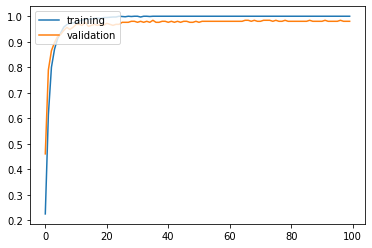

540/540 [==============================] - 0s 18us/step
Test accuracy:  0.9777777791023254


In [117]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

In [125]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same')) #padding = 'same': 강제로 제로 패딩 지정
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())    
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [126]:
model = deep_cnn()
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_153 (Activation)  (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_154 (Activation)  (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_155 (Activation)  (None, 4, 4, 50)        

파라미터 수가 116,310개이다.

- 첫 컨볼루션 망에서 파라미터 수가 500인 이유:
    - 필터 크기 (3 * 3) * 필터 수 (50) = 450
    - 바이어스 수 (==필터 수, 50) = 50
        - 450 + 50 = 500
        
        
- flatten의 출력값이 50개 인 이유:
    - 이전 레이어의 출력값 이미지 크기 (1 * 1) * 이전 레이어 필터 수(50) = 50
    - flatten은 함수를 딱히 적용하지 않기 때문에 바이어스가 없다.
        
        
- 마지막 레이어에서 파라미터 수가 510인 이유:
    - 이전 레이어에서 출력값 수 (50) * 마지막 레이어 뉴런 수 (10) = 500
    - 바이어스 수 (==뉴런 수, 10) = 10
        - 500 + 10 = 510

In [127]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

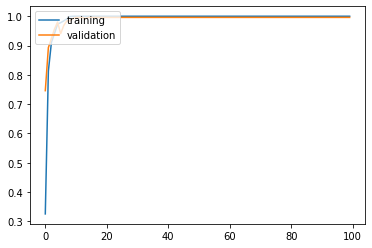

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [129]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])    # 오히려 결과가 떨어짐

540/540 [==============================] - 0s 97us/step
Test accuracy:  0.9814814925193787


## 3-3. CNN + 최적화 몇가지

In [130]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())    #배치 정규화
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())    #배치 정규화
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())    #배치 정규화
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())    #배치 정규화
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())    #배치 정규화
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())    #배치 정규화
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))    #초기화
    model.add(Dropout(0.5))    #드롭아웃: 보통 초기화/드롭아웃 등은 CNN보다는 DNN에만 적용해주는 편이다
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [131]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_25 (Batc (None, 8, 8, 50)          200       
_________________________________________________________________
activation_159 (Activation)  (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_26 (Batc (None, 8, 8, 50)          200       
_________________________________________________________________
activation_160 (Activation)  (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 50)        

In [132]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

In [133]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])             

540/540 [==============================] - 0s 94us/step
Test accuracy:  0.9851852059364319


깊게 쌓는다고, 최적화를 추가한다고 딱히 성능이 좋아지지는 않는다.

--> CNN에서 깊은 모델을 구축하는 것의 어려움